In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, linear_model
from sklearn.metrics import f1_score
from sklearn.metrics.scorer import make_scorer
import mord as m

In [2]:
#load_path = 'D:\EECE499\Features\\'
load_path = '..\..\..\\'

In [3]:
Features = pd.read_excel(load_path + 'Features.xlsx')

In [4]:
def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1) 
    z = [x for _, x in sorted(zipped_pairs)] 
    return z

In [5]:
def f1_micro(y_test, y_pred):
    return f1_score(y_test, y_pred, average='micro')

In [6]:
def f1_macro(y_test, y_pred):
    return f1_score(y_test, y_pred, average='macro')

In [7]:
def f1_weighted(y_test, y_pred):
    return f1_score(y_test, y_pred, average='weighted')

In [8]:
def f1_samples(y_test, y_pred):
    return f1_score(y_test, y_pred, average='samples')

In [9]:
f1_micro_score = make_scorer(f1_micro, greater_is_better=True)
f1_macro_score = make_scorer(f1_macro, greater_is_better=True)
f1_weighted_score = make_scorer(f1_weighted, greater_is_better=True)
f1_samples_score = make_scorer(f1_samples, greater_is_better=True)

# Arousal

In [10]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -5].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [13]:
classifier = m.OrdinalRidge()
classifier.fit(X_train, y_train)

OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [16]:
confusion_mtrx

array([[ 0,  0,  0,  1,  0,  1,  0],
       [ 0,  0,  2,  1,  8,  0,  0],
       [ 0,  0,  1,  3, 16,  0,  0],
       [ 0,  0,  2, 13, 28,  3,  0],
       [ 0,  0,  0, 17, 54,  3,  0],
       [ 0,  0,  0,  7, 30,  5,  2],
       [ 0,  0,  0,  0,  9,  5,  2]], dtype=int64)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [18]:
print(accuracy, mae, rmse)

0.352112676056338 0.92018779342723 1.6056338028169015


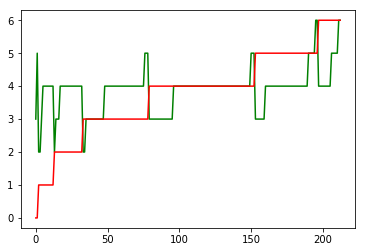

In [19]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

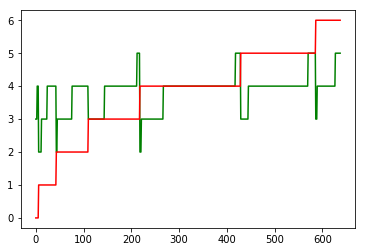

In [20]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
F

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 featur

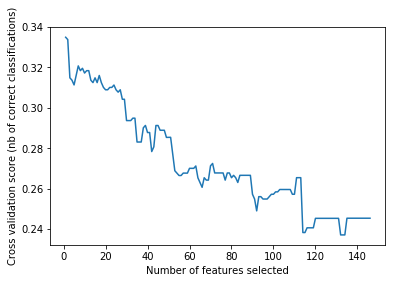

In [21]:
classifier = m.OrdinalRidge()

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring=f1_micro_score, verbose=1)
X_new = rfecv.fit_transform(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [22]:
X_new.shape

(851, 1)

In [23]:
rfecv.ranking_

array([  2,   1, 123,  10, 135, 146,  84,   9, 137,  19, 136,  46,  44,
        25,  76,  80,  45,  26,  92,  79,  73,  89,  61,  99,  62,  71,
       134,  14, 133, 103, 122,  65,  43,  22,  32,  16, 108, 138,  33,
       127, 110, 121,  67,  36,  28,  38,   4,  98, 139,  29, 132, 112,
       120,  55,  37,  17,  41,   5, 101, 141,  54, 128, 115, 117,  64,
        40,  15,  34,  12, 102, 140,  50, 126, 118, 111,  66,  39,  27,
        58,  21, 100, 144,   8, 130, 114, 125,  63,  42,  20,  53,  18,
       104, 145,  23, 129, 116, 119,  68,  49,  24,  51,  11, 105, 143,
        35, 131, 109, 124,  52,  47,  30,  56, 107, 142, 106,  95,  31,
        13,  96,  97,  94,  57,   7,   6,  85, 113,  83,   3,  48,  81,
        82,  74,  86,  91,  70,  87,  72,  88,  75,  69,  90,  93,  59,
        60,  77,  78])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [25]:
y_pred = rfecv.estimator_.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [27]:
print(accuracy, mae, rmse)

0.14553990610328638 1.5211267605633803 3.408450704225352


In [28]:
y_f1_micro = sort_list(y_pred, y_test)

Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
F

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\c

Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator wit

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\c

Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 fe

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\c

Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
F

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\c

Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\c

Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 1

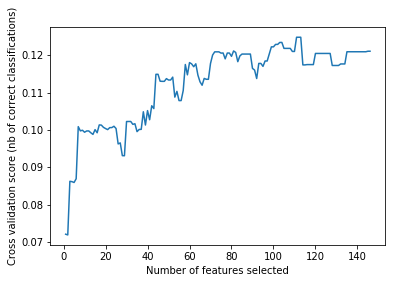

In [29]:
classifier = m.OrdinalRidge()

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring=f1_macro_score, verbose=1)
X_new = rfecv.fit_transform(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [30]:
X_new.shape

(851, 111)

In [31]:
rfecv.ranking_

array([ 1,  1, 13,  1, 25, 36,  1,  1, 27,  1, 26,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 24,  1, 23,  1, 12,  1,  1,  1,
        1,  1,  1, 28,  1, 17,  1, 11,  1,  1,  1,  1,  1,  1, 29,  1, 22,
        2, 10,  1,  1,  1,  1,  1,  1, 31,  1, 18,  5,  7,  1,  1,  1,  1,
        1,  1, 30,  1, 16,  8,  1,  1,  1,  1,  1,  1,  1, 34,  1, 20,  4,
       15,  1,  1,  1,  1,  1,  1, 35,  1, 19,  6,  9,  1,  1,  1,  1,  1,
        1, 33,  1, 21,  1, 14,  1,  1,  1,  1,  1, 32,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [33]:
y_pred = rfecv.estimator_.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [35]:
print(accuracy, mae, rmse)

0.0892018779342723 2.164319248826291 6.427230046948357


In [36]:
y_f1_macro = sort_list(y_pred, y_test)

Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
F

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\c

Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\c

Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 fe

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\c

Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.


C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\c

Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.


C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\c

Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.


C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\c

Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 fe

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\c

Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 fea

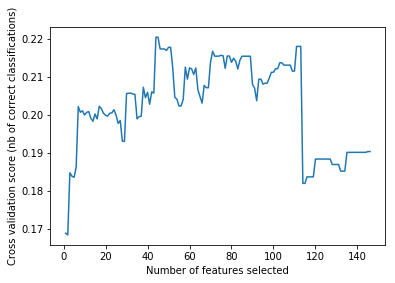

In [37]:
classifier = m.OrdinalRidge()

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring=f1_weighted_score, verbose=1)
X_new = rfecv.fit_transform(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [38]:
X_new.shape

(851, 44)

In [39]:
rfecv.ranking_

array([  1,   1,  80,   1,  92, 103,  41,   1,  94,   1,  93,   3,   1,
         1,  33,  37,   2,   1,  49,  36,  30,  46,  18,  56,  19,  28,
        91,   1,  90,  60,  79,  22,   1,   1,   1,   1,  65,  95,   1,
        84,  67,  78,  24,   1,   1,   1,   1,  55,  96,   1,  89,  69,
        77,  12,   1,   1,   1,   1,  58,  98,  11,  85,  72,  74,  21,
         1,   1,   1,   1,  59,  97,   7,  83,  75,  68,  23,   1,   1,
        15,   1,  57, 101,   1,  87,  71,  82,  20,   1,   1,  10,   1,
        61, 102,   1,  86,  73,  76,  25,   6,   1,   8,   1,  62, 100,
         1,  88,  66,  81,   9,   4,   1,  13,  64,  99,  63,  52,   1,
         1,  53,  54,  51,  14,   1,   1,  42,  70,  40,   1,   5,  38,
        39,  31,  43,  48,  27,  44,  29,  45,  32,  26,  47,  50,  16,
        17,  34,  35])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [41]:
y_pred = rfecv.estimator_.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [43]:
print(accuracy, mae, rmse)

0.13145539906103287 1.9389671361502347 5.676056338028169


In [44]:
y_f1_weighted = sort_list(y_pred, y_test)

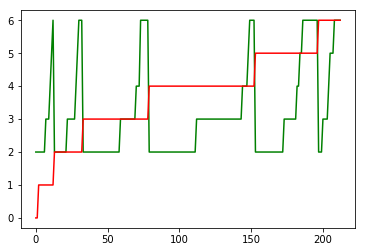

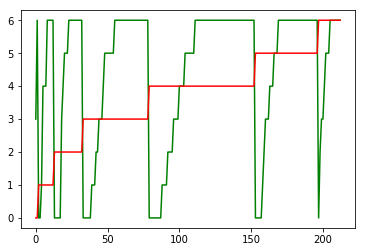

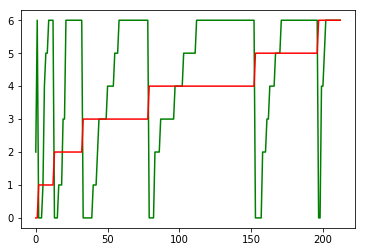

In [46]:
plt.plot(y_f1_micro, color='green')
plt.plot(sorted(y_test), color='red')
plt.show()
plt.plot(y_f1_macro, color='green')
plt.plot(sorted(y_test), color='red')
plt.show()
plt.plot(y_f1_weighted, color='green')
plt.plot(sorted(y_test), color='red')
plt.show()

# Engaging

In [24]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -4].values

# Familiarity

In [43]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -3].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [45]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [46]:
classifier = m.OrdinalRidge()
classifier.fit(X_train, y_train)

OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)

In [47]:
y_pred = classifier.predict(X_test)

In [48]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [49]:
confusion_mtrx

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0,  8,  4,  0],
       [ 0,  0,  0,  0, 39, 30,  0],
       [ 0,  0,  0,  1, 16, 66,  3],
       [ 1,  0,  0,  1, 11, 25,  2]], dtype=int64)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [51]:
print(accuracy, mae, rmse)

0.5023474178403756 0.6572769953051644 1.136150234741784


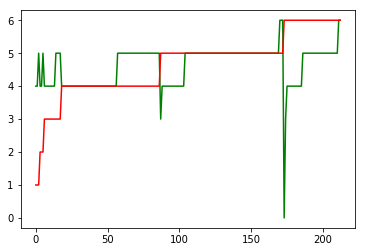

In [52]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

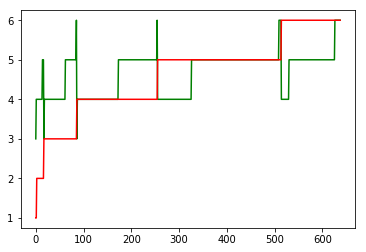

In [53]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
F

Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 fe

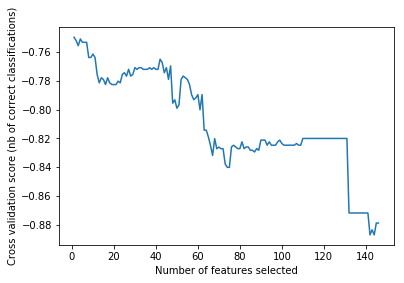

In [54]:
classifier = m.OrdinalRidge()

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='neg_mean_absolute_error', verbose=1)
X_new = rfecv.fit_transform(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [55]:
X_new.shape

(851, 1)

In [56]:
rfecv.ranking_

array([127, 143,  37,   4,   3,  36, 142,   5,  97, 146, 144, 145,   1,
         9,  93,  47,  67,   8,  46,  69, 100,  78,  71,  73,  70,  91,
        81,  72,  56,  42, 134,  10, 112, 110, 141, 111,   6,  31,  57,
        51,  34, 133,   7, 117, 123, 119,  94,  20,  50,  54,  60,  40,
       138,  14, 125, 115, 126, 107,  44,  39,  12,  58,  25, 132,  13,
       106, 104, 140, 101,  41,  48,  49,  61,  22, 131,  19, 120, 116,
       128, 108,  38,  43,  33,  53,  21, 136,  17, 122, 121, 130, 102,
        32,  52,  62,  63,  23, 135,  15, 124, 118, 139, 105,  16,  45,
        66,  55,  35, 137,  18, 114, 113, 129, 109,  24,   2,  68,  98,
        30,  82,  27,  99,  90,  96,  29,  11,  26,  89, 103,  88,  85,
        28,  59,  80,  64,  76,  86,  84,  65,  77,  83,  75,  79,  87,
        74,  95,  92])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [58]:
y_pred = rfecv.estimator_.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [60]:
print(accuracy, mae, rmse)

0.3380281690140845 0.8779342723004695 1.3943661971830985


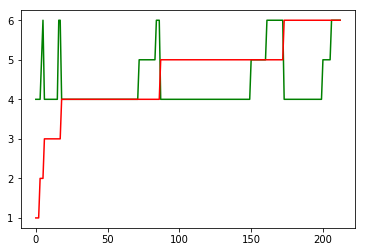

In [61]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

# Liking

In [62]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -2].values

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [64]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [65]:
classifier = m.OrdinalRidge()
classifier.fit(X_train, y_train)

OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)

In [66]:
y_pred = classifier.predict(X_test)

In [67]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [68]:
confusion_mtrx

array([[ 0,  0,  0,  6,  3,  0,  0],
       [ 0,  0,  0,  9,  9,  0,  0],
       [ 0,  0,  0, 20, 16,  0,  0],
       [ 0,  0,  1, 14, 24,  2,  0],
       [ 0,  0,  2, 12, 15,  3,  0],
       [ 0,  0,  4, 15, 30,  2,  0],
       [ 0,  0,  1,  4, 13,  7,  1]], dtype=int64)

In [69]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [70]:
print(accuracy, mae, rmse)

0.15023474178403756 1.3896713615023475 2.7981220657276995


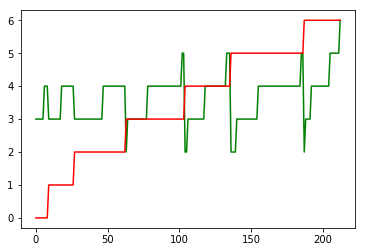

In [71]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

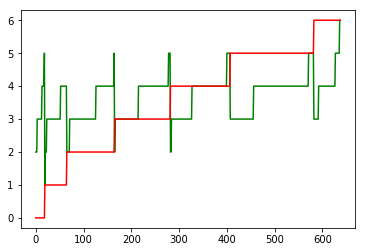

In [72]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
F

Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Optimal number of features : 1


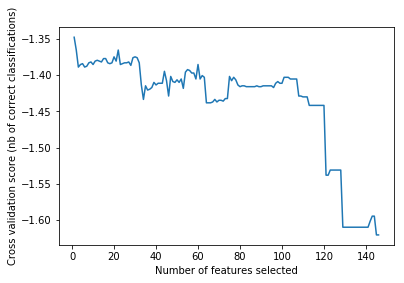

In [73]:
classifier = m.OrdinalRidge()

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='neg_mean_absolute_error', verbose=1)
X_new = rfecv.fit_transform(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [74]:
X_new.shape

(851, 1)

In [75]:
rfecv.ranking_

array([133, 145,  63,  12,  11,  43, 139,  42,  71, 146, 131, 140,  40,
        45,  84,  74,  75,  44,  73,  65,  64,  82,  76,  69,  68,  80,
        93,  70,  19,  55, 123,  33, 112, 142,  79, 103,  10,  20,  34,
         6,  49, 124,  32, 119, 134, 105, 111,  21,  14,  48,  13,  51,
       129,  28, 135, 132, 101, 110,  15,  23,  81,  22,  47, 125,  36,
       136, 144, 104, 114,   8,  25,  83,   1,  50, 128,  31, 120, 143,
       102, 116,  26,   9,  88,   4,  56, 127,  38, 138, 141,  91, 118,
        27,   7,  85,   5,  46, 122,  35, 117, 130, 100, 113,  24,  17,
        90,   2,  52, 126,  39, 121, 137,  95, 115,  18,  41,  30,  94,
        59,  87,  29,  99,  97, 109,  54,   3,  53,  37,  96, 108,  78,
       107,  16,  58,  60,  72,  62,  57,  61,  98,  86,  66,  77,  92,
        67,  89, 106])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [77]:
y_pred = rfecv.estimator_.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [79]:
print(accuracy, mae, rmse)

0.11737089201877934 1.7981220657276995 4.746478873239437


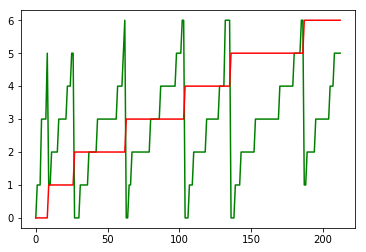

In [80]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

# Valence

In [81]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -1].values

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [83]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [84]:
classifier = m.OrdinalRidge()
classifier.fit(X_train, y_train)

OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)

In [85]:
y_pred = classifier.predict(X_test)

In [86]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [87]:
confusion_mtrx

array([[10, 62, 27,  0,  0],
       [ 2, 25,  8,  0,  0],
       [ 3,  9,  8,  2,  0],
       [ 0, 13, 10,  6,  0],
       [ 2, 11, 13,  2,  0]], dtype=int64)

In [88]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [89]:
print(accuracy, mae, rmse)

0.2300469483568075 1.164319248826291 2.112676056338028


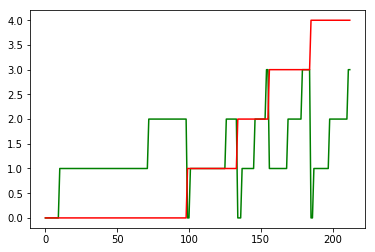

In [90]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

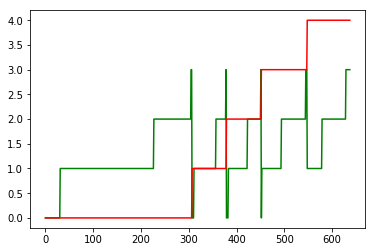

In [91]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
F

Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 fe

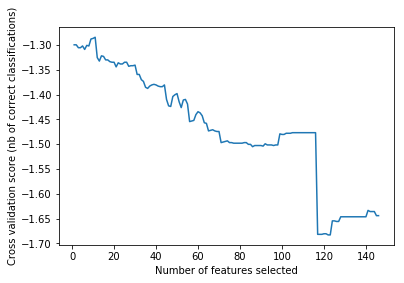

In [92]:
classifier = m.OrdinalRidge()

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='neg_mean_absolute_error', verbose=1)
X_new = rfecv.fit_transform(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [93]:
X_new.shape

(851, 11)

In [94]:
rfecv.ranking_

array([116, 135,   1,  29,  30,  98, 134,  23,  55, 136, 108, 129,   6,
        34,  64,  50,  48,  33,  49,  91,  67,  68,  56,  32,  31,  63,
        59,  72,   2,   8, 119,  18, 117,  97,  58, 128,  44,  40,  62,
        11,   7, 122,  22, 111,  99,  93, 127,  37,  36,  60,   4,   9,
       121,  16, 110, 100,  79, 130,  35,  38,  73,   1,   3, 124,  19,
       109, 101,  90, 133,  20,  46,  77,   1,   1, 126,  15, 114, 104,
        66, 107,  25,  42,  26,   1,   1, 120,  12, 113, 103,  74, 118,
        39,  47,  57,   1,   5, 125,  14, 115, 106,  92, 132,  43,  45,
        75,   1,   1, 123,  21, 112, 105,  84, 131,  41,  10,   1,  80,
        69,  13,  51,  96,  86,  88,  85,  24,   1,  27,  87, 102,  76,
        28,  17,  78,  53,  65,  52,  54,  82,  61,  81,  89,  94,  95,
        83,  71,  70])

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [96]:
y_pred = rfecv.estimator_.predict(X_test)

In [97]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [98]:
print(accuracy, mae, rmse)

0.43661971830985913 1.2394366197183098 3.511737089201878


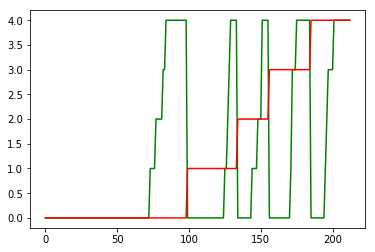

In [99]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')